installing kaggle to read dataset

In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')  #Mounting Gdrive for kaggle API storage

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp "/content/drive/MyDrive/Colab Notebooks/Kaggle_Cred/kaggle.json" ~/.kaggle/kaggle.json

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download vipoooool/new-plant-diseases-dataset # Download the dataset from kaggle

 99% 2.68G/2.70G [00:18<00:00, 199MB/s]
100% 2.70G/2.70G [00:19<00:00, 152MB/s]


In [7]:
!unzip -q new-plant-diseases-dataset.zip # unzipping the dataset

In [6]:
import warnings
warnings.filterwarnings("ignore")
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import itertools
import os as os
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [7]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
data_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
vaild_dir = data_dir + "/valid"
diseases = os.listdir(train_dir) #disease

In [10]:
print("Total number of disease are: {}".format(len(diseases)))

Total number of disease are: 38


In [9]:
plants = []
number_of_diseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        number_of_diseases += 1

In [11]:
print(f"The unique Plants are: \n{plants}")
print("Number of diseases: {}".format(number_of_diseases))

The unique Plants are: 
['Raspberry', 'Tomato', 'Corn_(maize)', 'Grape', 'Apple', 'Pepper,_bell', 'Blueberry', 'Potato', 'Peach', 'Strawberry', 'Soybean', 'Cherry_(including_sour)', 'Squash', 'Orange']
Number of diseases: 26


In [12]:
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))

# convert it into pandas dataframe
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["number of images"])
img_per_class

,number of images
Raspberry___healthy,1781
Tomato___Tomato_Yellow_Leaf_Curl_Virus,1961
Corn_(maize)___Northern_Leaf_Blight,1908
Grape___Black_rot,1888
Apple___Black_rot,1987
Tomato___Early_blight,1920
Apple___healthy,2008
"Pepper,_bell___Bacterial_spot",1913
Blueberry___healthy,1816
Tomato___Target_Spot,1827


Text(0.5, 1.0, 'Images per each class of plant disease')

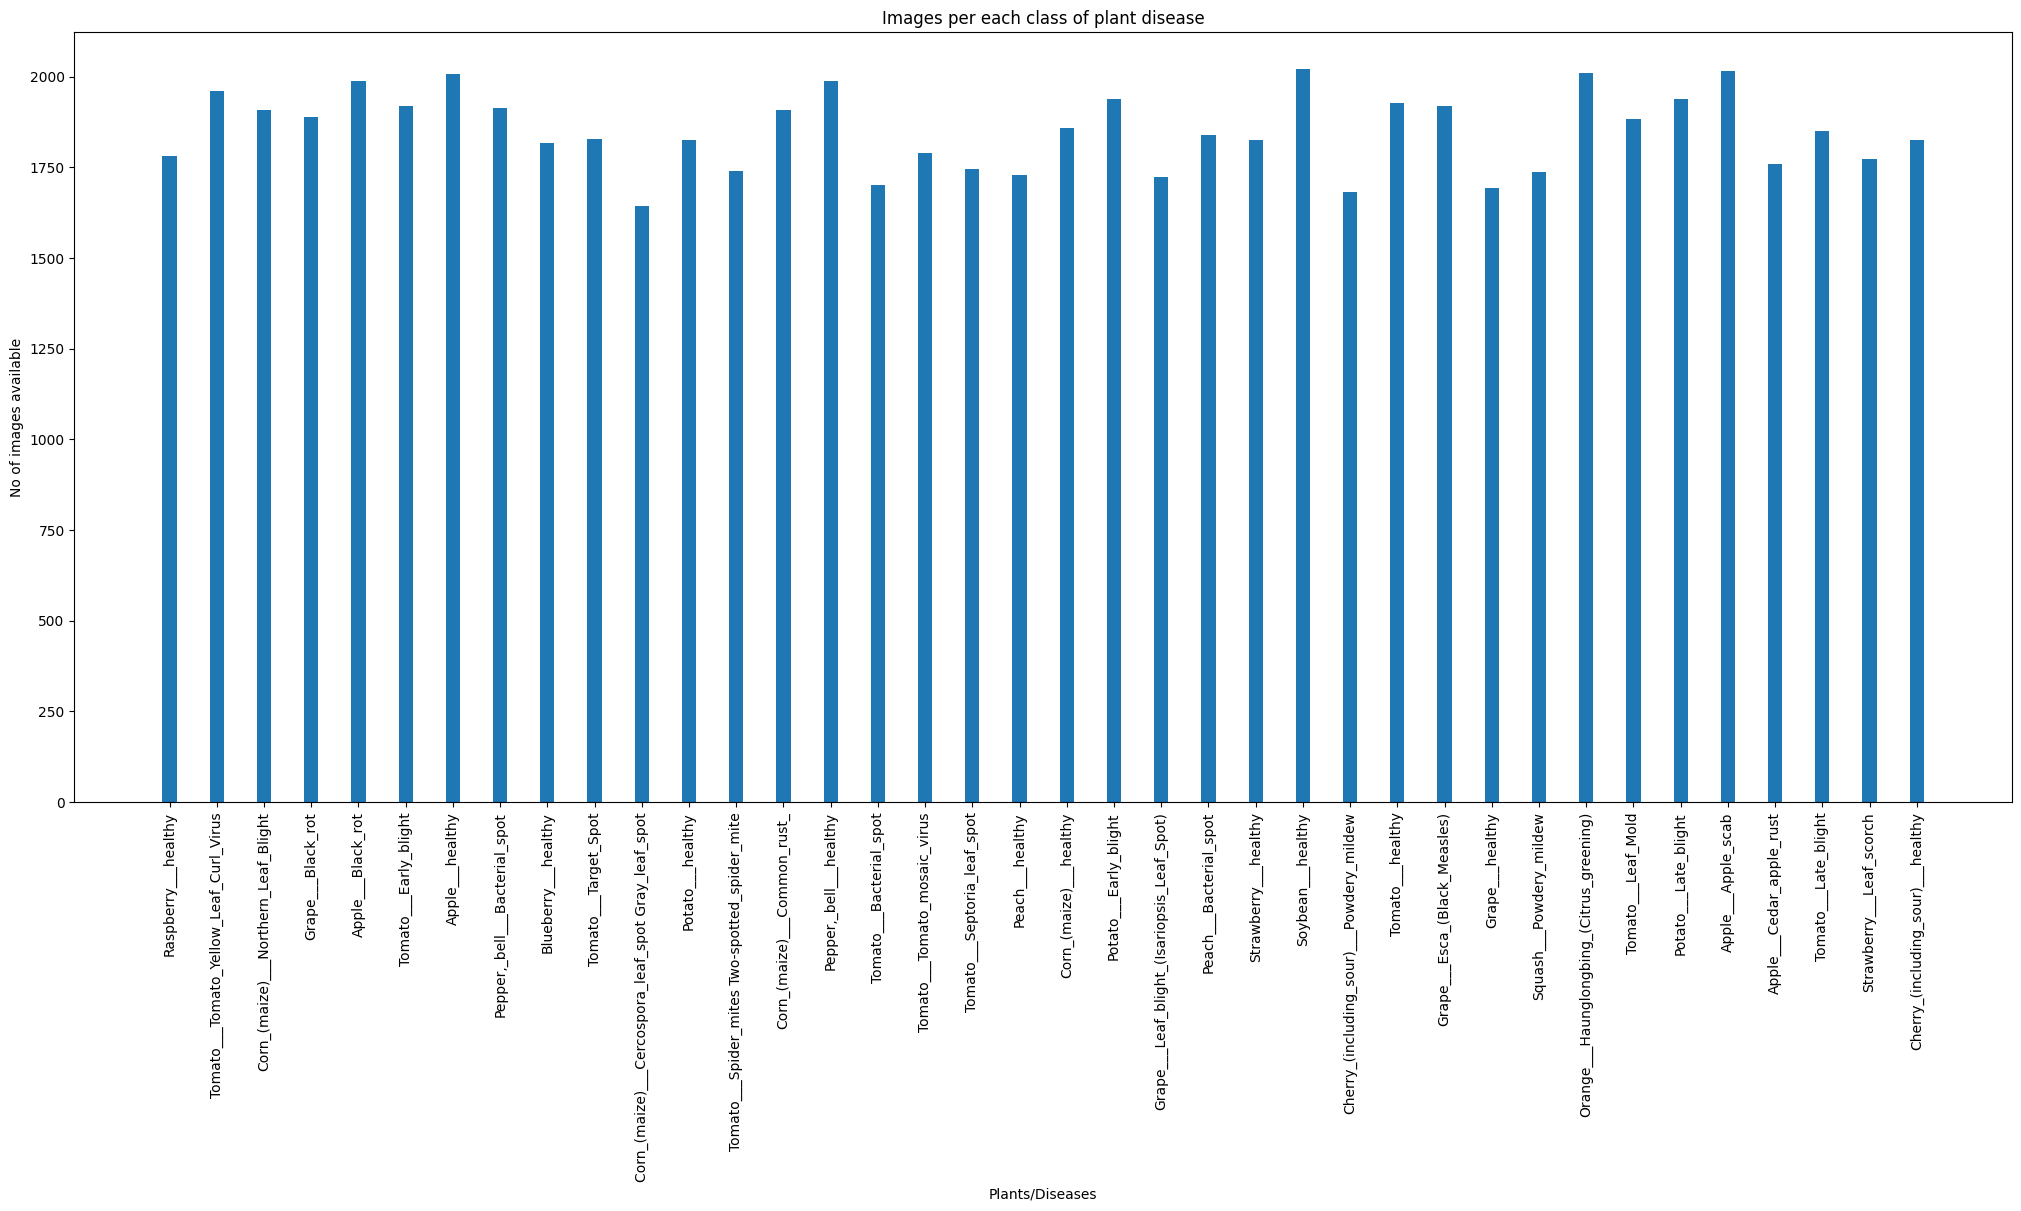

In [13]:
index = [n for n in range(38)]
plt.figure(figsize=(25, 10))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=10, rotation=90)
plt.title('Images per each class of plant disease')

In [14]:
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
train_gen = tf.keras.preprocessing.image_dataset_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         batch_size=64, image_size=(256, 256))
test_gen = tf.keras.preprocessing.image_dataset_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        batch_size=64, image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)

train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Layer 1: Convolutional layer
model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 2: Convolutional layer
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 3: Convolutional layer
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

# Layer 4: Convolutional layer
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

# Layer 5: Convolutional layer
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten the CNN output for Dense layers
model.add(Flatten())

# Layer 6: Dense/Fully Connected layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Layer 7: Dense/Fully Connected layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(38, activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 62, 62, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 256)       614656    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 384)       885120    
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 384)      

In [20]:
from tensorflow.keras.optimizers import Adam

# Assuming 'model' is the AlexNet-like architecture you've defined earlier

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# 'sparse_categorical_crossentropy' is used if the labels are integers, 'categorical_crossentropy' if one-hot encoded

# Train the model using fit_generator
epochs = 10
history = model.fit(train_gen, validation_data=test_gen, epochs=epochs)


Epoch 1/10
1099/1099 [==============================] - 199s 167ms/step - loss: 2.5521 - accuracy: 0.2763 - val_loss: 1.4040 - val_accuracy: 0.5792
Epoch 2/10
1099/1099 [==============================] - 168s 153ms/step - loss: 1.2697 - accuracy: 0.6085 - val_loss: 0.9944 - val_accuracy: 0.6871
Epoch 3/10
1099/1099 [==============================] - 138s 125ms/step - loss: 0.9624 - accuracy: 0.6967 - val_loss: 0.7455 - val_accuracy: 0.7639
Epoch 4/10
1099/1099 [==============================] - 164s 149ms/step - loss: 0.8138 - accuracy: 0.7406 - val_loss: 0.7148 - val_accuracy: 0.7721
Epoch 5/10
1099/1099 [==============================] - 167s 152ms/step - loss: 0.7240 - accuracy: 0.7713 - val_loss: 0.5723 - val_accuracy: 0.8169
Epoch 6/10
1099/1099 [==============================] - 143s 130ms/step - loss: 0.6449 - accuracy: 0.7948 - val_loss: 0.6168 - val_accuracy: 0.8039
Epoch 7/10
1099/1099 [==============================] - 159s 145ms/step - loss: 0.5979 - accuracy: 0.8098 - val_

*********************************************************************


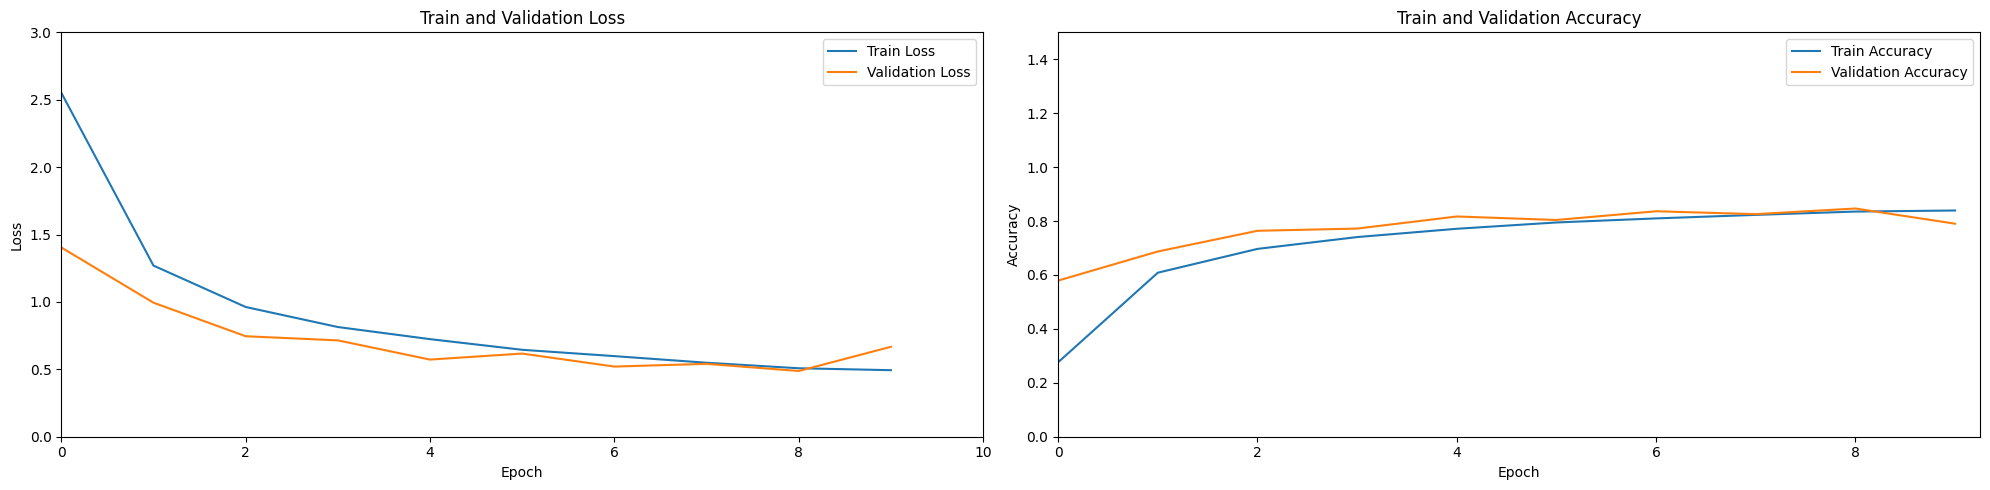

In [63]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,3)
plt.legend()
print("*********************************************************************")
plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0,1.5)
plt.legend()
plt.tight_layout()

In [22]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

2/2 [==============================] - 1s 642ms/step


In [44]:
import numpy as np
predictions_reshaped = np.array(predictions).reshape(-1, 17572)  # Adjust '10' based on the number of output classes in your model
labels_reshaped = np.array(labels).reshape(-1, 17572)  # Adjust '10' based on the number of output classes in your model


In [49]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 83.91 %
Test Accuracy   : 79.02 %
Precision Score : 79.02 %
Recall Score    : 79.02 %


<Figure size 2000x500 with 0 Axes>

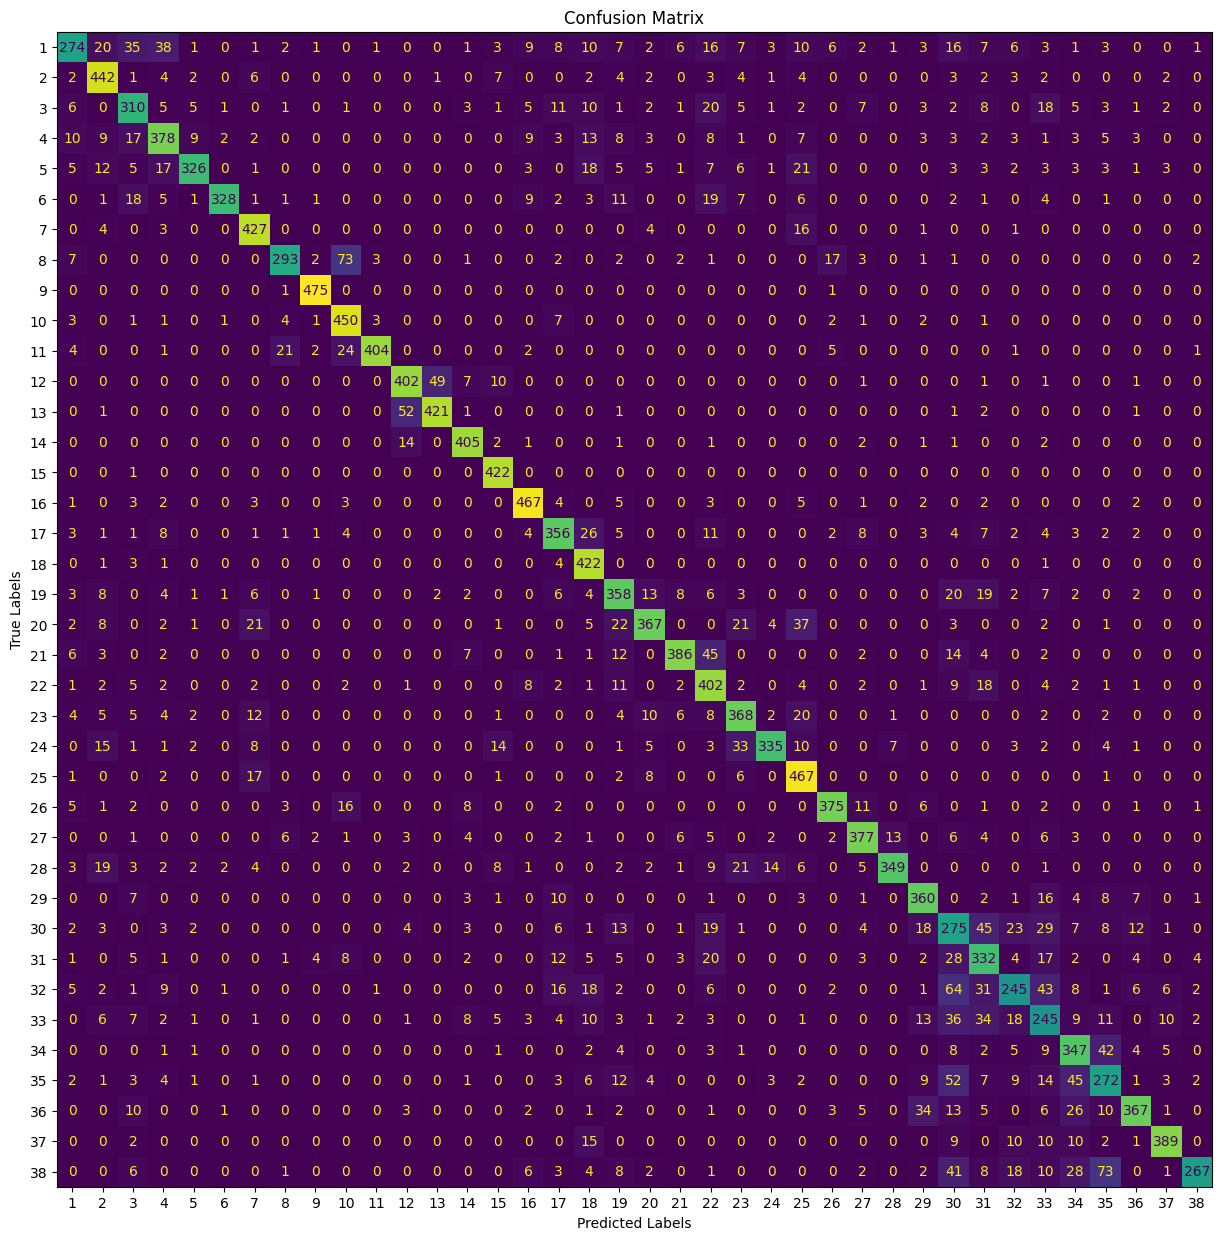

In [50]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [51]:
model.save('plantclassify_alexnet.h5')
print('saved')

saved


In [52]:
class_names = sorted(os.listdir(train_dir))
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('plantclassify_alexnet.h5')

def test_model(model, image_path, class_names):
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class_idx]

    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_class_name}')
    plt.show()

    return predicted_class_name

1/1 [==============================] - 0s 132ms/step


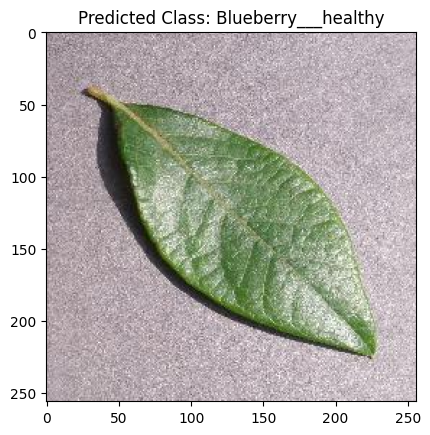

In [54]:
image_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Blueberry___healthy/00fee259-67b7-4dd7-8b36-12503bbdba14___RS_HL 2681_180deg.JPG'
predicted_class = test_model(model, image_path, class_names)

1/1 [==============================] - 0s 57ms/step


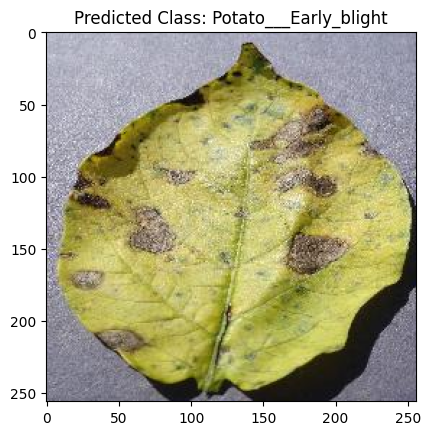

In [56]:
image_path = 'test/test/PotatoEarlyBlight4.JPG'
predicted_class = test_model(model, image_path, class_names)

1/1 [==============================] - 0s 33ms/step


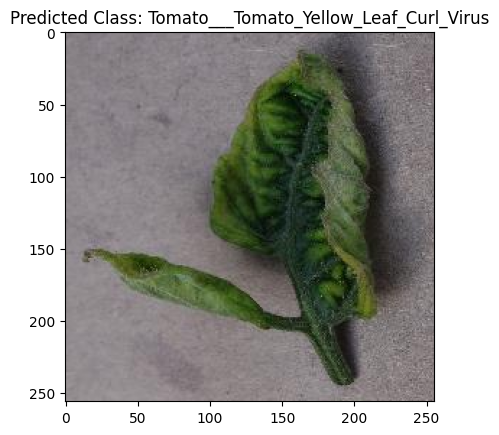

In [57]:
image_path = 'test/test/TomatoYellowCurlVirus3.JPG'
predicted_class = test_model(model, image_path, class_names)

1/1 [==============================] - 0s 32ms/step


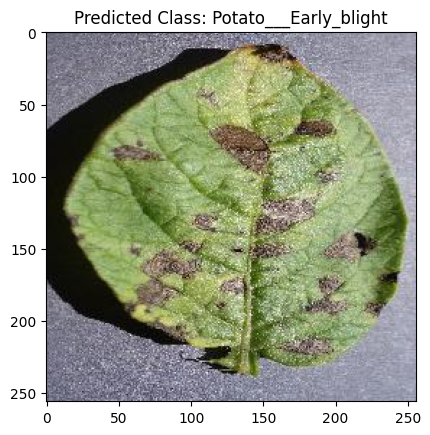

In [59]:
image_path = 'test/test/PotatoEarlyBlight2.JPG'
predicted_class = test_model(model, image_path, class_names)

1/1 [==============================] - 0s 31ms/step


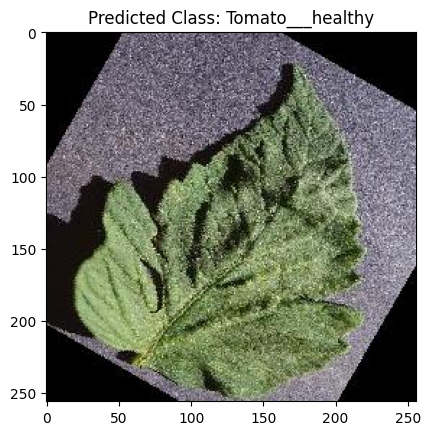

In [61]:
image_path = 'test/test/TomatoHealthy3.JPG'
predicted_class = test_model(model, image_path, class_names)